## 2. Ortogonalūs krypčių laukai

Dviejų pirmos eilės diferencialinių lygčių su ortogonaliais krypčių laukais integralinių kreivių (ar bent pačių krypčių laukų) braižymas. Ortogonalūs krypčių laukai apibrėžti antros paskaitos 9-oje skaidrėje: uždavus vieną diferencialinę lygtį $\ y'=F(x,y),\ $ kitos diferencinės lygties $\ F(x,y)\,y'+1=0\ $ krypčių laukas bus ortogonalus (t.y., $90^o$ statmenas duotos lygties krypčių laukui) kiekviename taške.

Praktiškai tikimasi arba dviejų (statmenų) krypčių laukų braižymo vienoje $(x,y)$-srityje skirtingomis spalvomis, arba panašiai, dviejų integralinių kreivių šeimų braižymo vienoje $(x,y)$-srityje.

In [265]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as sc
import itertools

np.seterr(divide="ignore")

{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [266]:
def cauchy_problem(F, x0, y0, x, y_divergence_threshold = 5):
    N = x.size - 1 
    N0 = round(N * (x0 - x[0]) / (x[-1] - x[0]))
    x = x + (x0 - x[N0])

    print("N0 = ", N0)

    # points that were calculated numerically integrating 
    # in the positive direction of given x values
    positive_points = []
    
    for point in zip(x[N0 + 1:], sc.odeint(F, y0, x[N0 + 1:]).flatten()):

        positive_points.append(point)

        # if y values go beyond some point, stop plotting
        if(abs(point[1]) > y_divergence_threshold):
            break

    # points that were calculated numerically integrating 
    # in the negative direction of given x values
    negative_points = []
    for point in list(zip(x[N0 - 1::-1], sc.odeint(F, y0, x[N0 - 1::-1]).flatten())):

        negative_points.append(point)

        # if y values go beyond some point, stop plotting
        if(abs(point[1]) > y_divergence_threshold):
            break

    negative_points.reverse()
    zipped = negative_points + positive_points
    unzipped = list(zip(*zipped))
    xs, ys = unzipped

    print("xs =", xs)
    print("ys =", ys)

    return (xs, ys)

#cauchy_problem(lambda x, y: 1 + x + y, 1/2, 1/2, np.linspace(-2, 2, 5), 10)

In [267]:
#def euler_int(F, p, N):
#    dir = F(*p)

#euler_int(lambda x, y: -x / y, p = (0, 1), 20)

In [268]:
def visualize(F, bounds = [(-1,1), (-1,1)], samples = 20, p = (-0.5,-0.5)):
    X = np.linspace(bounds[0][0], bounds[0][1], samples)
    Y = np.linspace(bounds[1][0], bounds[1][1], samples)

    XS, YS = np.meshgrid(X, Y);

    FY = F(XS, YS)
    
    FX = 1 / np.sqrt(1 + FY**2)
    FY = FX * FY

    XP = np.linspace(bounds[0][0], bounds[0][1], 2 * samples)
    p1 = cauchy_problem(lambda y, x: F(x, y), *p, XP, min(abs(bounds[1][0]), abs(bounds[1][1]))
    p2 = cauchy_problem(lambda y, x: -1/F(x, y), *p, XP)

    plt.figure(figsize = (6,6))
    
    plt.quiver(XS, YS, FX, FY, color="red", pivot="mid", headaxislength=0, headwidth=0, headlength=0);
    plt.quiver(XS, YS, -FY, FX, color="blue", pivot="mid", headaxislength=0, headwidth=0, headlength=0);

    plt.plot(*p1, color="red")

    # visualizing solution of orthogonal direction field is not visually appealing
    plt.plot(*p2, color="blue")

    margin = 0.1
    plt.xlim([bounds[0][0] - margin, bounds[0][1] + margin])
    plt.ylim([bounds[1][0] - margin, bounds[1][1] + margin])

    plt.show()

N0 =  4
xs = (-2.8000000000000003, -1.2000000000000002, 0.40000000000000036, 3.5999999999999996)
ys = (5.840000020922124, 2.640000020922121, 2.0, 2.0)
N0 =  4
xs = (-1.2000000000000002, 0.40000000000000036, 3.5999999999999996)
ys = (37.05430986731444, 2.0, 2.0)


c:\Users\Arnas\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\integrate\_odepack_py.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


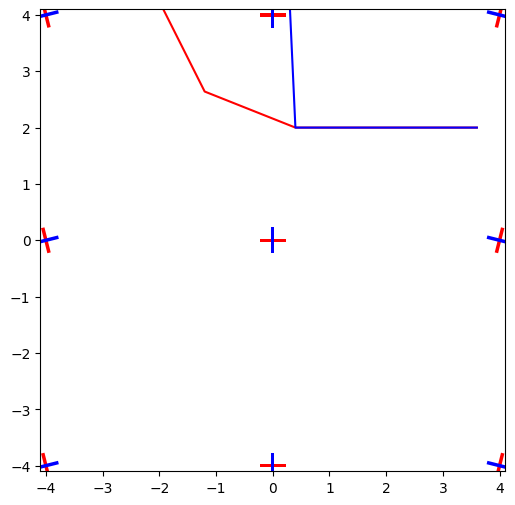

In [269]:
# change parameters here
visualize(
    lambda x, y: x,
    bounds = [(-4,4), (-4,4)],
    p = (2,2),
    samples=3)